<a href="https://colab.research.google.com/github/Nikhil-Kudupudi/StoryTellingWithData/blob/assignments/Lab%2001_DataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background: linear-gradient(90deg, #17a2b8 0%, #0e5a63 60%, #0a3d44 100%); color: white; padding: 18px 25px; margin-bottom: 20px;">
    <div style="display: flex; justify-content: space-between; align-items: baseline;">
        <h1 style="font-family: 'Helvetica Neue', sans-serif; font-size: 24px; margin: 0; font-weight: 300;">
            Lab 1: Data Processing & Cleaning - From Messy to Ready
        </h1>
        <span style="font-size: 11px; opacity: 0.9;">© Prof. Dehghani</span>
    </div>
    <p style="font-size: 13px; margin-top: 6px; margin-bottom: 0; opacity: 0.9;">
        Data Preprocessing Fundamentals | Real-World Data Cleaning | Essential Skills
    </p>
</div>

<div style="background: white; padding: 15px 20px; margin-bottom: 12px; border-left: 3px solid #17a2b8;">
    <h3 style="color: #17a2b8; font-size: 14px; margin: 0 0 8px 0; text-transform: uppercase; letter-spacing: 0.5px;">What is Data Processing & Cleaning?</h3>
    <p style="color: #555; line-height: 1.6; margin: 0; font-size: 13px;">
        Data processing and cleaning is the foundation of any successful data analysis project. Raw data from the real world is rarely perfect - it contains missing values, duplicates, inconsistent formats, and outliers. This lab teaches you the essential skills to transform messy, real-world data into clean, analysis-ready datasets. Think of it as preparing ingredients before cooking a meal - without proper preparation, even the best recipe will fail.
    </p>
</div>

<table style="width: 100%; border-spacing: 12px;">
<tr>
<td style="background: white; padding: 12px 15px; border-top: 3px solid #17a2b8; vertical-align: top; width: 50%;">
    <h4 style="color: #17a2b8; font-size: 13px; margin: 0 0 8px 0; font-weight: 600;">What You'll Learn Today</h4>
    <ul style="color: #555; line-height: 1.4; margin: 0; padding-left: 18px; font-size: 12px;">
        <li>How to load and inspect real datasets</li>
        <li>Identifying and handling missing values</li>
        <li>Detecting and removing duplicates</li>
        <li>Correcting data types for analysis</li>
        <li>Outlier detection and treatment</li>
        <li>Feature scaling and selection techniques</li>
    </ul>
</td>
<td style="background: white; padding: 12px 15px; border-top: 3px solid #00acc1; vertical-align: top; width: 50%;">
    <h4 style="color: #00acc1; font-size: 13px; margin: 0 0 8px 0; font-weight: 600;">Lab Structure</h4>
    <div style="color: #555; font-size: 12px; line-height: 1.6;">
        <div style="padding: 2px 0;"><strong>Section 1:</strong> Welcome & Data Loading (10 min)</div>
        <div style="padding: 2px 0;"><strong>Section 2:</strong> Missing Value Handling (15 min)</div>
        <div style="padding: 2px 0;"><strong>Section 3:</strong> Duplicate Detection & Removal (10 min)</div>
        <div style="padding: 2px 0;"><strong>Section 4:</strong> Data Type Correction (15 min)</div>
        <div style="padding: 2px 0;"><strong>Section 5:</strong> Outlier Treatment (10 min)</div>
        <div style="padding: 2px 0;"><strong>Section 6:</strong> Feature Scaling & Selection (15 min)</div>
    </div>
</td>
</tr>
</table>

<div style="background: linear-gradient(90deg, #e8f5e9 0%, #c8e6c9 100%); padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h2 style="color: #2e7d32; font-size: 18px; margin: 0;">Section 1: Welcome & Data Loading</h2>
    <p style="color: #555; font-size: 12px; margin-top: 8px; margin-bottom: 0;">
        Let's start by getting your name and loading our student habits dataset for analysis.
    </p>
</div>

In [ ]:
# ============================================
# CELL 1: Personal Welcome & Setup
# Purpose: Welcome the student and collect their name
# ============================================

# Let's start by getting your name for a personalized experience
student_name = input("Welcome to Data Processing & Cleaning! What's your name? ")

print(f"\n🔬 Hello {student_name}! Welcome to Lab 1: Data Processing & Cleaning!")
print(f"Great to have you here, {student_name}. Let's transform messy data into clean insights!\n")

Welcome to Data Processing & Cleaning! What's your name? Nikhil

🔬 Hello Nikhil! Welcome to Lab 1: Data Processing & Cleaning!
Great to have you here, Nikhil. Let's transform messy data into clean insights!



In [ ]:
# ============================================
# CELL 2: Import Required Libraries
# Purpose: Load the essential data processing tools
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import VarianceThreshold

# Let's check if everything loaded correctly
print("✅ Success! All libraries loaded.")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Success! All libraries loaded.
Pandas version: 2.2.2
NumPy version: 2.0.2


In [ ]:
# ============================================
# CELL 3: Enhanced Pretty Print Function
# Purpose: Create beautiful output displays with multiple themes
# ============================================

def pretty_print(title, content, style='info'):
    """Display formatted output in a styled box with different themes

    Args:
        title (str): The title of the message box
        content (str): The content to display
        style (str): Theme style - 'info', 'success', 'warning', 'error'
    """

    # Define color schemes
    themes = {
        'info': {
            'primary': '#17a2b8',
            'secondary': '#0e5a63',
            'background': '#f8f9fa'
        },
        'success': {
            'primary': '#28a745',
            'secondary': '#155724',
            'background': '#f8fff9'
        },
        'warning': {
            'primary': '#ffc107',
            'secondary': '#e0a800',
            'background': '#fffdf5'
        },
        'error': {
            'primary': '#dc3545',
            'secondary': '#721c24',
            'background': '#fdf2f2'
        }
    }

    theme = themes.get(style, themes['info'])

    html = f'''
    <div style="border-radius: 5px;
                margin: 10px 0;
                width: 20cm;
                max-width: 20cm;
                box-sizing: border-box;
                box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
        <div style="background: linear-gradient(90deg, {theme['primary']} 0%, {theme['secondary']} 100%);
                    padding: 10px 15px; border-radius: 5px 5px 0 0;">
            <strong style="color: white; font-size: 14px;">{title}</strong>
        </div>
        <div style="background: {theme['background']}; padding: 10px 15px; border-radius: 0 0 5px 5px;
                    border-left: 3px solid {theme['primary']};">
            <div style="color: rgba(0,0,0,0.8); font-size: 12px; line-height: 1.5;">{content}</div>
        </div>
    </div>
    '''
    display(HTML(html))

# Test our enhanced function
pretty_print(f"Welcome {student_name}!",
             "This function will help us display information beautifully throughout the lab.",
             'info')

<div style="background: white; padding: 15px 20px; margin-bottom: 12px; border-left: 3px solid #17a2b8;">
    <h3 style="color: #17a2b8; font-size: 14px; margin: 0 0 8px 0;">Why Data Cleaning Matters</h3>
    <p style="color: #555; line-height: 1.6; margin: 0; font-size: 13px;">
        Data scientists spend 60-80% of their time cleaning data because real-world datasets are messy. Poor data quality leads to incorrect conclusions, biased models, and failed projects. IBM estimates that bad data costs the US economy $3.1 trillion annually. By mastering these skills, you're building the foundation for reliable data science.
    </p>
</div>

<div style="background: linear-gradient(90deg, #e8f5e9 0%, #c8e6c9 100%); padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h2 style="color: #2e7d32; font-size: 18px; margin: 0;">Load & Inspect Data</h2>
    <p style="color: #555; font-size: 12px; margin-top: 8px; margin-bottom: 0;">
        Let's load our student habits dataset and explore its structure, quality, and characteristics.
    </p>
</div>

In [ ]:
# ============================================
# CELL 4: Load and Inspect Dataset
# Purpose: Load the student habits dataset and perform initial exploration
# ============================================

# Load data directly from GitHub
github_url = "https://raw.githubusercontent.com/mdehghani86/StorytellingData/main/DataFiles/Lab%201_student_habits_performance.csv"

try:
    df = pd.read_csv(github_url)
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 DataFrame shape: {df.shape} (rows, columns)\n")

    pretty_print("Dataset Overview",
                 f"Successfully loaded {df.shape[0]} student records with {df.shape[1]} variables measuring study habits and academic performance.",
                 'success')

except Exception as e:
    pretty_print("Loading Error",
                 f"Failed to load dataset: {str(e)}",
                 'error')

# Display first 5 rows
print("🔍 Preview of the data:")
display(df.head())

✅ Dataset loaded successfully!
📊 DataFrame shape: (1011, 16) (rows, columns)



🔍 Preview of the data:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
# ============================================
# CELL 5: Column Analysis
# Purpose: Examine data types and structure
# ============================================

# Create a comprehensive overview table
column_info = pd.DataFrame({
    "Column": df.columns,
    "Data Type": [str(dt) for dt in df.dtypes],
    "Non-Null Count": [df[col].count() for col in df.columns],
    "Null Count": [df[col].isnull().sum() for col in df.columns],
    "Unique Values": [df[col].nunique() for col in df.columns]
})

print("📋 Column Information:")
display(column_info)

pretty_print("Data Structure Analysis",
             f"Found {len(df.columns)} columns with various data types. This gives us insight into what cleaning steps we'll need.",
             'info')

📋 Column Information:


,Column,Data Type,Non-Null Count,Null Count,Unique Values
0,student_id,object,1011,0,1000
1,age,int64,1011,0,8
2,gender,object,1011,0,3
3,study_hours_per_day,float64,1011,0,78
4,social_media_hours,float64,1006,5,60
5,netflix_hours,float64,1011,0,51
6,part_time_job,object,1011,0,2
7,attendance_percentage,float64,1011,0,320
8,sleep_hours,float64,1011,0,75
9,diet_quality,object,1001,10,3


In [ ]:
# Calculate missing value statistics
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

# Create missing value summary
missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_percent
}).sort_values("Missing Count", ascending=False)

# Display only columns with missing values
print("\n📋 Columns with Missing Values:")
display(missing_summary[missing_summary['Missing Count'] > 0])


📋 Columns with Missing Values:


,Missing Count,Missing %
parental_education_level,93,9.20
diet_quality,10,0.99
exam_score,6,0.59
social_media_hours,5,0.49


<div style="background: #f8fffe; border: 1px solid #17a2b8; border-radius: 8px; padding: 20px; margin: 20px 0;">
    <div style="background: linear-gradient(90deg, #17a2b8 0%, #14919e 100%); color: white; padding: 8px 15px; margin: -20px -20px 15px -20px; border-radius: 8px 8px 0 0;">
        <h3 style="margin: 0; font-size: 14px; text-transform: uppercase; letter-spacing: 1px;">TASK: DEFINE YOUR ANALYTICAL QUESTIONS</h3>
    </div>
    <p style="color: #555; line-height: 1.6; margin: 0 0 15px 0; font-size: 13px;">
        Before cleaning data, you should know what questions you want to answer. This helps you decide which cleaning steps are necessary and which variables are most important.
    </p>
    <div style="background: #f0f8ff; padding: 15px; border-radius: 5px; border-left: 4px solid #17a2b8;">
        <h4 style="color: #17a2b8; font-size: 12px; margin: 0 0 10px 0; font-weight: 600;">Write three analytical questions you'd like to explore:</h4>
        <div style="font-family: monospace; font-size: 11px; line-height: 2;">
            1. Does sleep hours and diet quality affect the mental health rating of students? and how does frequent exercise play role in this? <br>
            2. how is study hours related to the score perfomance?if yes, is social media one of the reason that affect most?<br>
            3. Part time job impact on sleep hours, and how does it change
                student score and attendance perncentage?
        </div>
    </div>
</div>

<div style="background: linear-gradient(90deg, #e8f5e9 0%, #c8e6c9 100%); padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h2 style="color: #2e7d32; font-size: 18px; margin: 0;">Section 2: Missing Value Analysis & Treatment</h2>
    <p style="color: #555; font-size: 12px; margin-top: 8px; margin-bottom: 0;">
        Missing values are one of the most common data quality issues. Let's identify and handle them systematically.
    </p>
</div>

In [ ]:
# ============================================
# CELL 6: Missing Value Analysis
# Purpose: Identify and quantify missing values
# ============================================

# Calculate missing value statistics
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)
total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()

# Create missing value summary
missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_percent
}).sort_values("Missing Count", ascending=False)

print("🔍 Missing Value Analysis:")
display(missing_summary)

print(f"\n📊 Overall Missing Data Summary:")
print(f"Total cells in dataset: {total_cells:,}")
print(f"Total missing values: {total_missing:,}")
print(f"Overall missing percentage: {(total_missing/total_cells)*100:.2f}%")

if total_missing > 0:
    pretty_print("Missing Values Detected",
                 f"Found {total_missing} missing values across the dataset. We need to decide how to handle these before analysis.",
                 'warning')
else:
    pretty_print("No Missing Values!",
                 "This dataset is complete - no missing values detected. This is rare in real-world data!",
                 'success')

🔍 Missing Value Analysis:


,Missing Count,Missing %
parental_education_level,93,9.20
diet_quality,10,0.99
exam_score,6,0.59
social_media_hours,5,0.49
study_hours_per_day,0,0.00
student_id,0,0.00
gender,0,0.00
age,0,0.00
attendance_percentage,0,0.00
part_time_job,0,0.00



📊 Overall Missing Data Summary:
Total cells in dataset: 16,176
Total missing values: 114
Overall missing percentage: 0.70%


<div style="background: #f8fffe; border: 1px solid #17a2b8; border-radius: 8px; padding: 20px; margin: 20px 0;">
    <div style="background: linear-gradient(90deg, #17a2b8 0%, #14919e 100%); color: white; padding: 8px 15px; margin: -20px -20px 15px -20px; border-radius: 8px 8px 0 0;">
        <h3 style="margin: 0; font-size: 14px; text-transform: uppercase; letter-spacing: 1px;">MISSING VALUE TREATMENT STRATEGIES</h3>
    </div>
    <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 15px;">
        <div style="background: #e8f5e8; padding: 12px; border-radius: 5px; border-left: 4px solid #28a745;">
            <h4 style="color: #28a745; font-size: 12px; margin: 0 0 8px 0; font-weight: 600;">Deletion Methods:</h4>
            <ul style="color: #555; font-size: 11px; margin: 0; padding-left: 15px; line-height: 1.5;">
                <li>Drop rows with any missing values</li>
                <li>Drop columns with too many missing values</li>
                <li>Drop specific rows/columns selectively</li>
            </ul>
        </div>
        <div style="background: #fff3e0; padding: 12px; border-radius: 5px; border-left: 4px solid #ff9800;">
            <h4 style="color: #e65100; font-size: 12px; margin: 0 0 8px 0; font-weight: 600;">Imputation Methods:</h4>
            <ul style="color: #555; font-size: 11px; margin: 0; padding-left: 15px; line-height: 1.5;">
                <li>Mean/median for numeric data</li>
                <li>Mode for categorical data</li>
                <li>Forward/backward fill for time series</li>
                <li>Advanced: KNN, iterative imputation</li>
            </ul>
        </div>
    </div>
</div>

In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# seperate the numeric and object type data columns
# replace numeric data with mean and replace object data with mode if missin data is lessthan 30%
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

numeric_columns,categorical_columns=df.select_dtypes(include=[np.number]), df.select_dtypes(exclude=[np.number])
for column in numeric_columns:
    if df[column].isna().mean()>0 and df[column].isna().mean() < 0.3:
        print(df[column].isna().mean())
        col_mean=df[column].mean()
        print(f"{column} missing data replaced with mean {col_mean} ")
        df[column].fillna(col_mean, inplace=True)
for column in categorical_columns:
    if df[column].isna().mean() > 0 and df[column].isna().mean() < 0.3:
        col_mode=df[column].mode()[0]
        print(f"{column} data replaced with mode {col_mode} ")
        df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
# ============================================
# CELL 7: Handle Missing Values
# Purpose: Apply missing value treatment strategy
# ============================================

# Store original shape for comparison
original_shape = df.shape

# Handle missing values (using dropna as example)
if total_missing > 0:
    # Drop rows with any missing values
    df_clean = df.dropna()

    print(f"📉 Missing Value Treatment Results:")
    print(f"Original shape: {original_shape}")
    print(f"After dropping missing values: {df_clean.shape}")
    print(f"Rows removed: {original_shape[0] - df_clean.shape[0]}")

    # Verify no missing values remain
    remaining_missing = df_clean.isnull().sum()
    print(f"Remaining missing values: {remaining_missing}")

    # Update our working dataframe
    df = df_clean

    pretty_print("Missing Values Handled",
                 f"Removed {original_shape[0] - df_clean.shape[0]} rows containing missing values. Dataset is now complete for analysis.",
                 'success')
else:
    print("✅ No missing values to handle - dataset is already complete!")

📉 Missing Value Treatment Results:
Original shape: (903, 16)
After dropping missing values: (903, 16)
Rows removed: 0
Remaining missing values: student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


<div style="background: linear-gradient(90deg, #e8f5e9 0%, #c8e6c9 100%); padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h2 style="color: #2e7d32; font-size: 18px; margin: 0;">Section 3: Duplicate Detection & Removal</h2>
    <p style="color: #555; font-size: 12px; margin-top: 8px; margin-bottom: 0;">
        Duplicate records can artificially inflate sample sizes and skew analysis results.
    </p>
</div>

In [ ]:
# ============================================
# CELL 8: Duplicate Detection
# Purpose: Identify duplicate records in the dataset
# ============================================

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
total_rows = len(df)

print(f"🔍 Duplicate Analysis:")
print(f"Total rows: {total_rows}")
print(f"Duplicate rows: {duplicate_count}")
print(f"Duplicate percentage: {(duplicate_count/total_rows)*100:.2f}%")

if duplicate_count > 0:
    print(f"\n📋 Sample duplicate records:")
    display(df[df.duplicated()].head())

    pretty_print("Duplicates Found",
                 f"Detected {duplicate_count} duplicate rows ({(duplicate_count/total_rows)*100:.1f}% of data). These should be removed to avoid bias.",
                 'warning')
else:
    pretty_print("No Duplicates",
                 "No duplicate rows found - each record is unique.",
                 'success')

🔍 Duplicate Analysis:
Total rows: 1011
Duplicate rows: 11
Duplicate percentage: 1.09%

📋 Sample duplicate records:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
282,S1102,18,Male,4.3,4.0,0.8,No,100.0,7.5,NaN,0,NaN,Average,1,No,60.8
283,S1103,20,Male,2.1,1.2,3.1,No,88.8,7.5,NaN,4,Master,Average,3,No,50.4
284,S1104,18,Male,3.8,3.3,2.5,No,90.0,7.6,NaN,5,Bachelor,Good,7,No,74.3
285,S1105,18,Male,1.4,3.9,3.9,Yes,68.1,8.0,NaN,4,High School,Average,4,Yes,32.8
286,S1106,22,Male,3.3,0.4,0.8,No,83.3,9.1,Good,6,High School,Good,4,Yes,82.3


In [ ]:
# ============================================
# CELL 9: Remove Duplicates
# Purpose: Remove duplicate records and verify removal
# ============================================

if duplicate_count > 0:
    # Remove duplicates
    df_no_dups = df.drop_duplicates()

    print(f"📉 Duplicate Removal Results:")
    print(f"Before removal: {len(df)} rows")
    print(f"After removal: {len(df_no_dups)} rows")
    print(f"Duplicates removed: {len(df) - len(df_no_dups)}")

    # Verify removal
    remaining_duplicates = df_no_dups.duplicated().sum()
    print(f"Remaining duplicates: {remaining_duplicates}")

    # Update working dataframe
    df = df_no_dups

    pretty_print("Duplicates Removed",
                 f"Successfully removed {len(df) - len(df_no_dups)} duplicate records. Dataset now contains only unique entries.",
                 'success')
else:
    print("✅ No duplicates to remove!")

📉 Duplicate Removal Results:
Before removal: 1011 rows
After removal: 1000 rows
Duplicates removed: 11
Remaining duplicates: 0


<div style="background: linear-gradient(90deg, #e8f5e9 0%, #c8e6c9 100%); padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h2 style="color: #2e7d32; font-size: 18px; margin: 0;">Section 4: Data Type Optimization</h2>
    <p style="color: #555; font-size: 12px; margin-top: 8px; margin-bottom: 0;">
        Proper data types improve memory efficiency and enable appropriate analysis methods.
    </p>
</div>

<div style="background: #f8fffe; border: 1px solid #17a2b8; border-radius: 8px; padding: 20px; margin: 20px 0;">
    <div style="background: linear-gradient(90deg, #17a2b8 0%, #14919e 100%); color: white; padding: 8px 15px; margin: -20px -20px 15px -20px; border-radius: 8px 8px 0 0;">
        <h3 style="margin: 0; font-size: 14px; text-transform: uppercase; letter-spacing: 1px;">TASK: IDENTIFY DATA TYPE IMPROVEMENTS</h3>
    </div>
    <p style="color: #555; line-height: 1.6; margin: 0 0 15px 0; font-size: 13px;">
        Review the current data types and identify opportunities for optimization.
    </p>
    <div style="background: #f0f8ff; padding: 15px; border-radius: 5px; border-left: 4px solid #17a2b8;">
        <h4 style="color: #17a2b8; font-size: 12px; margin: 0 0 10px 0; font-weight: 600;">List three data type improvements you would make:</h4>
        <div style="font-family: monospace; font-size: 11px; line-height: 2;">
            1. convert the yes or no column values to boolean.<br>
            2. set student_id as index <br>
            3. set gender as  category type
        </div>
    </div>
</div>

In [ ]:
# ============================================
# CELL 10: Data Type Analysis & Optimization
# Purpose: Review current data types and optimize them
# ============================================

print("🔍 Current Data Types:")
print(df.dtypes)
print(f"\n📊 Memory usage before optimization: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")

# Apply data type optimizations
print(f"\n🔄 Applying Data Type Optimizations...")

# Convert categorical columns
if 'gender' in df.columns:
    df['gender'] = df['gender'].astype('category')
    print("✅ Converted 'gender' to category")

if 'parental_education_level' in df.columns:
    df['parental_education_level'] = df['parental_education_level'].astype('category')
    print("✅ Converted 'parental_education_level' to category")
if 'internet_quality' in df.columns:
    df['internet_quality'] = df['internet_quality'].astype('category')
    print("✅ Converted 'internet_quality' to category")

# Convert Yes/No columns to boolean
yes_no_columns = []
for col in df.columns:
    if df[col].dtype == 'object' and set(df[col].dropna().unique()).issubset({'Yes', 'No', 'yes', 'no'}):
        df[col] = df[col].map({'Yes': True, 'No': False, 'yes': True, 'no': False})
        yes_no_columns.append(col)

if yes_no_columns:
    print(f"✅ Converted {len(yes_no_columns)} Yes/No columns to boolean: {yes_no_columns}")

# Set student_id as index if it exists
if 'student_id' in df.columns:
    df.set_index('student_id', inplace=True)
    print("✅ Set 'student_id' as index")

print(f"\n🔍 Optimized Data Types:")
print(df.dtypes)
print(f"\n📊 Memory usage after optimization: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")

pretty_print("Data Types Optimized",
             f"Successfully optimized data types for better memory efficiency and analysis capabilities.",
             'success')

🔍 Current Data Types:
student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

📊 Memory usage before optimization: 399.1 KB

🔄 Applying Data Type Optimizations...
✅ Converted 'gender' to category
✅ Converted 2 Yes/No columns to boolean: ['part_time_job', 'extracurricular_participation']
✅ Set 'student_id' as index

🔍 Optimized Data Types:
age                                 int64
gen

/tmp/ipython-input-10779300.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].astype('category')
/tmp/ipython-input-10779300.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'Yes': True, 'No': False, 'yes': True, 'no': False})
/tmp/ipython-input-10779300.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

<div style="background: linear-gradient(90deg, #e8f5e9 0%, #c8e6c9 100%); padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h2 style="color: #2e7d32; font-size: 18px; margin: 0;">Section 5: Outlier Detection & Treatment</h2>
    <p style="color: #555; font-size: 12px; margin-top: 8px; margin-bottom: 0;">
        Outliers can significantly impact statistical analyses and model performance.
    </p>
</div>

In [ ]:
# ============================================
# CELL 11: Outlier Detection using IQR Method
# Purpose: Identify outliers in numeric columns
# ============================================

# Select numeric columns for outlier analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if numeric_cols:
    print(f"🔍 Analyzing outliers in numeric columns: {numeric_cols}")

    # Example: Analyze sleep_hours if it exists
    target_col = 'sleep_hours' if 'sleep_hours' in numeric_cols else numeric_cols[0]

    # Calculate IQR bounds
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)]
    outlier_count = len(outliers)

    print(f"\n📊 Outlier Analysis for '{target_col}':")
    print(f"Q1 (25th percentile): {Q1:.2f}")
    print(f"Q3 (75th percentile): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print(f"Outliers detected: {outlier_count} ({(outlier_count/len(df))*100:.1f}%)")

    if outlier_count > 0:
        pretty_print("Outliers Detected",
                     f"Found {outlier_count} outliers in '{target_col}' using IQR method. Consider treatment options.",
                     'warning')
    else:
        pretty_print("No Outliers",
                     f"No outliers detected in '{target_col}' using IQR method.",
                     'success')
else:
    print("No numeric columns found for outlier analysis.")

🔍 Analyzing outliers in numeric columns: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']

📊 Outlier Analysis for 'sleep_hours':
Q1 (25th percentile): 5.60
Q3 (75th percentile): 7.30
IQR: 1.70
Lower bound: 3.05
Upper bound: 9.85
Outliers detected: 9 (0.9%)


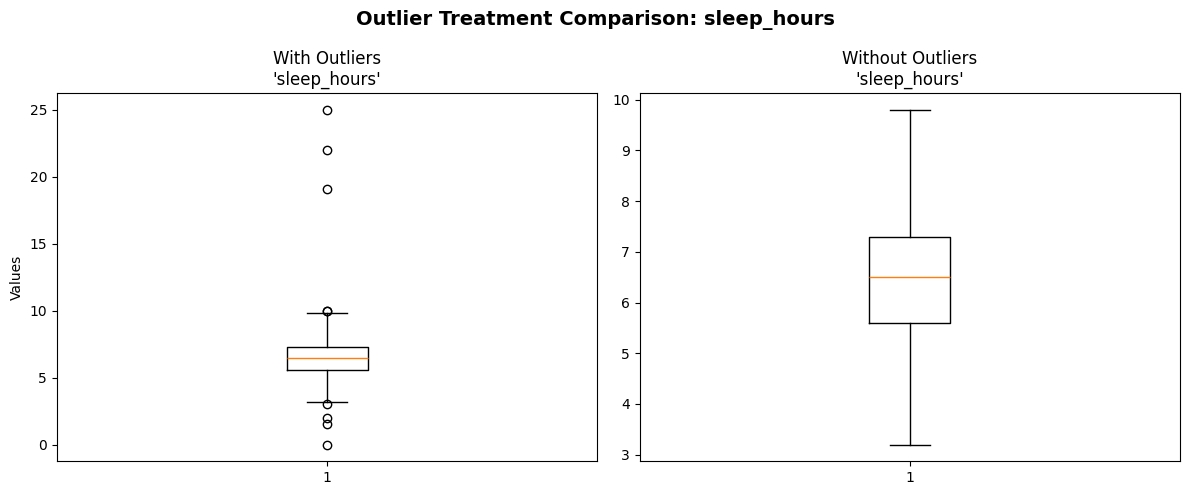

📉 Outlier Treatment Results:
Original data points: 1000
After outlier removal: 991
Data points removed: 9


In [ ]:
# ============================================
# CELL 12: Visualize Outliers with Box Plots
# Purpose: Create before/after comparison of outlier treatment
# ============================================

if numeric_cols and outlier_count > 0:
    # Create visualization
    fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

    # Original data
    axes[0].boxplot(df[target_col].dropna())
    axes[0].set_title(f"With Outliers\n'{target_col}'")
    axes[0].set_ylabel("Values")

    # Filtered data (without outliers)
    df_no_outliers = df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]
    axes[1].boxplot(df_no_outliers[target_col].dropna())
    axes[1].set_title(f"Without Outliers\n'{target_col}'")

    plt.suptitle(f"Outlier Treatment Comparison: {target_col}", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print(f"📉 Outlier Treatment Results:")
    print(f"Original data points: {len(df)}")
    print(f"After outlier removal: {len(df_no_outliers)}")
    print(f"Data points removed: {len(df) - len(df_no_outliers)}")

    # For this lab, we'll keep the original data but note the outliers
    pretty_print("Outlier Analysis Complete",
                 f"Identified {outlier_count} outliers in '{target_col}'. In practice, you would decide whether to remove, transform, or keep these values based on domain knowledge.",
                 'info')

<div style="background: linear-gradient(90deg, #e8f5e9 0%, #c8e6c9 100%); padding: 15px; border-radius: 5px; margin: 20px 0;">
    <h2 style="color: #2e7d32; font-size: 18px; margin: 0;">Section 6: Feature Scaling & Selection</h2>
    <p style="color: #555; font-size: 12px; margin-top: 8px; margin-bottom: 0;">
        Prepare features for analysis by scaling and selecting the most informative variables.
    </p>
</div>

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 15px; border-radius: 8px; margin: 20px 0; color: white;">
    <h2 style="color: white; font-size: 16px; margin: 0 0 10px 0; display: flex; align-items: center;">
        <span style="background: rgba(255,255,255,0.2); padding: 4px 8px; border-radius: 12px; font-size: 12px; margin-right: 10px;">ASSIGNMENT</span>
        Scaling & Selection Challenge
    </h2>
    <p style="color: rgba(255,255,255,0.9); font-size: 13px; margin: 0; line-height: 1.5;">
        Apply 2-3 scaling and selection techniques to your cleaned dataset. Document the effects of each method.
    </p>
</div>

In [ ]:
# ============================================
# CELL 13: Feature Scaling Examples
# Purpose: Demonstrate different scaling techniques
# ============================================

# Select numeric columns for scaling
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) >= 2:
    # Select first two numeric columns for demonstration
    demo_cols = numeric_cols[:2]
    print(f"🔧 Demonstrating scaling techniques on: {demo_cols}")

    # Create scaled versions
    scaler_standard = StandardScaler()
    scaler_minmax = MinMaxScaler()
    scaler_robust = RobustScaler()

    # Apply scaling
    df_scaled = df.copy()

    for col in demo_cols:
        # StandardScaler (mean=0, std=1)
        df_scaled[f'{col}_standard'] = scaler_standard.fit_transform(df[[col]])

        # MinMaxScaler (range 0-1)
        df_scaled[f'{col}_minmax'] = scaler_minmax.fit_transform(df[[col]])

        # RobustScaler (median and IQR)
        df_scaled[f'{col}_robust'] = scaler_robust.fit_transform(df[[col]])

    # Show comparison
    comparison_cols = [demo_cols[0]] + [f'{demo_cols[0]}_standard', f'{demo_cols[0]}_minmax', f'{demo_cols[0]}_robust']
    print(f"\n📊 Scaling Comparison for '{demo_cols[0]}':")
    display(df_scaled[comparison_cols].describe())

    pretty_print("Feature Scaling Applied",
                 f"Demonstrated three scaling techniques. Each preserves relationships while transforming the scale for better model performance.",
                 'success')
else:
    print("Insufficient numeric columns for scaling demonstration.")

🔧 Demonstrating scaling techniques on: ['age', 'study_hours_per_day']

📊 Scaling Comparison for 'age':


,age,age_standard,age_minmax,age_robust
count,1000.0000,1.000000e+03,1000.000000,1000.000000
mean,20.4980,-4.991563e-16,0.499714,0.117176
std,2.3081,1.000500e+00,0.329729,0.543082
min,17.0000,-1.516291e+00,0.000000,-0.705882
25%,18.7500,-7.577120e-01,0.250000,-0.294118
50%,20.0000,-2.158699e-01,0.428571,0.000000
75%,23.0000,1.084551e+00,0.857143,0.705882
max,24.0000,1.518025e+00,1.000000,0.941176


In [ ]:
# ============================================
# CELL 14: Final Dataset Summary & Export
# Purpose: Summarize cleaning results and save cleaned dataset
# ============================================

print(f"🎯 Data Cleaning Summary for {student_name}:")
print(f"{'='*50}")
print(f"Final dataset shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print(f"Data types: {df.dtypes.value_counts().to_dict()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Save cleaned dataset
output_filename = 'student_habits_cleaned.csv'
df.to_csv(output_filename)
print(f"\n💾 Cleaned dataset saved as: {output_filename}")

pretty_print(f"Lab Complete - Congratulations {student_name}!",
             f"You've successfully cleaned and preprocessed the student habits dataset! The data is now ready for analysis and modeling. You've learned essential data cleaning skills that form the foundation of all data science projects.",
             'success')

print(f"\n✨ Outstanding work, {student_name}! You're ready for advanced analysis and visualization!")

<div style="background: #f8fffe; border: 1px solid #17a2b8; border-radius: 8px; padding: 20px; margin: 20px 0;">
    <div style="background: linear-gradient(90deg, #17a2b8 0%, #14919e 100%); color: white; padding: 8px 15px; margin: -20px -20px 15px -20px; border-radius: 8px 8px 0 0;">
        <h3 style="margin: 0; font-size: 14px; text-transform: uppercase; letter-spacing: 1px;">LAB SUMMARY</h3>
    </div>
    <h4 style="color: #17a2b8; font-size: 14px; margin: 0 0 10px 0;">Skills You Mastered:</h4>
    <ul style="color: #555; font-size: 12px; margin: 0 0 15px 0; padding-left: 20px; line-height: 1.6;">
        <li>Loading and inspecting real-world datasets</li>
        <li>Identifying and handling missing values systematically</li>
        <li>Detecting and removing duplicate records</li>
        <li>Optimizing data types for memory and analysis efficiency</li>
        <li>Detecting outliers using statistical methods</li>
        <li>Applying feature scaling techniques for model preparation</li>
    </ul>
    <p style="color: #555; font-size: 12px; margin: 0; font-weight: 600;">
        <strong>Next Steps:</strong> Use your cleaned dataset for exploratory data analysis and visualization!
    </p>
</div>

<div style="background: linear-gradient(90deg, #17a2b8 0%, #0e5a63 60%, #0a3d44 100%); color: white; padding: 20px; border-radius: 5px; margin-top: 30px;">
    <h2 style="font-size: 20px; margin: 0;">Data Cleaning: The Foundation of Data Science</h2>
    <p style="font-size: 13px; line-height: 1.8; margin-top: 10px; margin-bottom: 15px;">
        You've successfully mastered the essential skills of data preprocessing! Clean data is the foundation of reliable insights, accurate models, and successful data science projects. These skills will serve you throughout your data science journey.
    </p>
    <div style="background: rgba(255,255,255,0.1); padding: 10px; border-radius: 3px; font-size: 12px;">
        <strong>Ready for the next challenge?</strong> Apply these cleaning techniques to your own datasets, experiment with different strategies, and remember: good analysis starts with good data preparation!
    </div>
</div>

<h2 style="color: #1E6FB7; border-bottom:2px solid #1E6FB7; padding-bottom:0.3em;">
  📊 Feature Scaling &amp; Selection Introduction
</h2>

<p style="font-size:1em; line-height:1.5;">
  After cleaning your data, two crucial steps remain before modeling:
</p>

<ul style="margin-left:1.2em; line-height:1.4;">
  <li>
    <strong>Feature Scaling:</strong>  
    Aligns numeric features to a common scale so that no single variable dominates due to its magnitude.  
    <em>Common techniques &amp; snippets:</em>
    <ul>
      <li>
        <code>StandardScaler</code> (zero mean, unit variance)<br/>
        <pre style="background:#F0F8FF; padding:0.3em; border-radius:4px; display:inline-block;">
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['col_scaled'] = scaler.fit_transform(df[['col']])</pre>
      </li>
      <li>
        <code>MinMaxScaler</code> (scales to [0,1])<br/>
        <pre style="background:#F0F8FF; padding:0.3em; border-radius:4px; display:inline-block;">
from sklearn.preprocessing import MinMaxScaler
df['col_norm'] = MinMaxScaler().fit_transform(df[['col']])</pre>
      </li>
      <li>
        <code>RobustScaler</code> (median &amp; IQR)<br/>
        <pre style="background:#F0F8FF; padding:0.3em; border-radius:4px; display:inline-block;">
from sklearn.preprocessing import RobustScaler
df['col_robust'] = RobustScaler().fit_transform(df[['col']])</pre>
      </li>
    </ul>
  </li>
  <li>
    <strong>Feature Selection:</strong>  
    Chooses the most informative variables, reducing dimensionality and improving model performance.  
    <em>Common techniques &amp; snippets:</em>
    <ul>
      <li>
        <code>VarianceThreshold</code> (drop low-variance features)<br/>
        <pre style="background:#F0F8FF; padding:0.3em; border-radius:4px; display:inline-block;">
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.1)
X_sel = sel.fit_transform(df[num_cols])</pre>
      </li>
      <li>
        Correlation filter (top-k features)<br/>
        <pre style="background:#F0F8FF; padding:0.3em; border-radius:4px; display:inline-block;">
# compute correlations and pick top k
corrs = df.corr()['target'].abs().sort_values(ascending=False)
top_features = corrs.iloc[1:k+1].index.tolist()</pre>
      </li>
      <li>
        Tree-based importances (<code>RandomForest</code>)<br/>
        <pre style="background:#F0F8FF; padding:0.3em; border-radius:4px; display:inline-block;">
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)</pre>
      </li>
    </ul>
  </li>
</ul>

<h2 style="color: #1E6FB7; border-bottom:2px solid #1E6FB7; padding-bottom:0.3em;">
  🚀 Assignment: Scaling &amp; Selection Choices
</h2>

<p style="font-size:1em; line-height:1.5;">
  Now it’s your turn! From the techniques above, select <strong>two to three</strong> methods (at least one for scaling and one for selection). For each:
</p>

<ol style="margin-left:1.2em; line-height:1.4;">
  <li>Apply the method to your cleaned DataFrame.</li>
  <li>Visualize or summarize the before &amp; after effects (e.g., distribution plots, feature counts).</li>
  <li>Write a brief observation (2–3 sentences) on how this technique impacted your data.</li>
</ol>

<p style="font-size:1em; line-height:1.5;">
  When complete, save your final DataFrame as <code>student_habits_cleaned.csv</code> and submit your code along with your observations as part of your analysis report.
</p>


